# What do our likelihood surfaces look like?

Bayes:

$$ p(\theta | d) \propto p(d|\theta) \pi(\theta)$$

For a uniform prior, the posterior will look like the likelihood, modulo a normalization factor.

Lets see what some of our univariate likelihood curves look like (i.e. holding all other parameters constant)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [4]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict

### 1. Example system

In [72]:
import numpy as np 
import logging 

logger = logging.getLogger().setLevel(logging.ERROR)

def iterate_over_iota(h_guess,iota_guess,measurement_model,seed):

    P    = SystemParameters(h=1e-12,σp=None,σm=1e-11,measurement_model=measurement_model,seed=seed)       #define the system parameters as a class

    PTA  = Pulsars(P)               # setup the PTA
    data = SyntheticData(PTA,P) # generate some synthetic data

    #Define the model 
    model = LinearModel(P)

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,PTA)

    # Run the KFwith the correct parameters
    true_parameters = priors_dict(PTA,P)
  
    true_parameters["iota_gw"] = iota_guess
    true_parameters["h"] = h_guess
    model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(true_parameters)


    return model_likelihood



In [91]:


iota_values = np.arange(0.9,1.1,0.01)
h_values = np.arange(0.8e-13,1.2e-12,1e-14)
seed = 1237 


surface_pulsar = np.zeros((len(iota_values), len(h_values)))


for i in range(len(iota_values)):
    for j in range(len(h_values)):

        surface_pulsar[i,j] = iterate_over_iota(h_values[j],iota_values[i],measurement_model="pulsar",seed = seed)
        #print(iota_values[i],h_values[j],surface_pulsar[i,j])




In [93]:
#save it for plotting later

outfile = 'tmp_likelihood_surface'
np.savez(outfile, x=iota_values, y=h_values,z=surface_pulsar)

In [94]:


iota_values = np.arange(0.9,1.1,0.01)
h_values = np.arange(0.8e-13,1.2e-12,1e-14)
seed = 1237 


surface_pulsar = np.zeros((len(iota_values), len(h_values)))


for i in range(len(iota_values)):
    for j in range(len(h_values)):

        surface_pulsar[i,j] = iterate_over_iota(h_values[j],iota_values[i],measurement_model="earth",seed = seed)
        #print(iota_values[i],h_values[j],surface_pulsar[i,j])

outfile = 'tmp_likelihood_surface_earth'
np.savez(outfile, x=iota_values, y=h_values,z=surface_pulsar)


In [95]:


iota_values = np.linspace(0.0,np.pi/2,10)
h_values = np.logspace(-13,-11,10)
seed = 1237 


surface_pulsar = np.zeros((len(iota_values), len(h_values)))


for i in range(len(iota_values)):
    for j in range(len(h_values)):

        surface_pulsar[i,j] = iterate_over_iota(h_values[j],iota_values[i],measurement_model="earth",seed = seed)
        #print(iota_values[i],h_values[j],surface_pulsar[i,j])

outfile = 'tmp_likelihood_surface2_earth'
np.savez(outfile, x=iota_values, y=h_values,z=surface_pulsar)


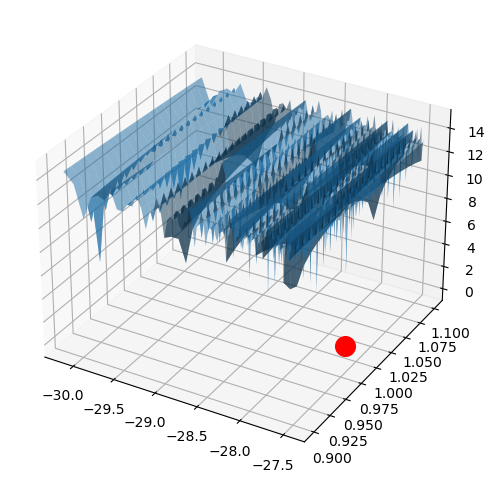

In [92]:

h_values_log = np.log(h_values)

X,Y = np.meshgrid(iota_values,h_values_log)

Z = np.log(np.abs(surface_pulsar)).reshape(X.shape)



import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
ax.plot_surface(Y, X, Z,alpha=0.5)


#ax.scatter(np.log(1e-12),1.0, 0.0,c='r',s=100)

ax.scatter(np.log(1e-12),1.0,0.0,c='r',s=200)

In [70]:
N = 5

iota_values = np.arange(0.9,1.1,0.05)
h_values = np.arange(5e-13,5e-12,1e-13)
seed = 1237 


surface_pulsar = np.zeros((len(iota_values), len(h_values)))


for i in range(len(iota_values)):
    for j in range(len(h_values)):

        surface_pulsar[i,j] = iterate_over_iota(h_values[j],iota_values[i],measurement_model="earth",seed = seed)




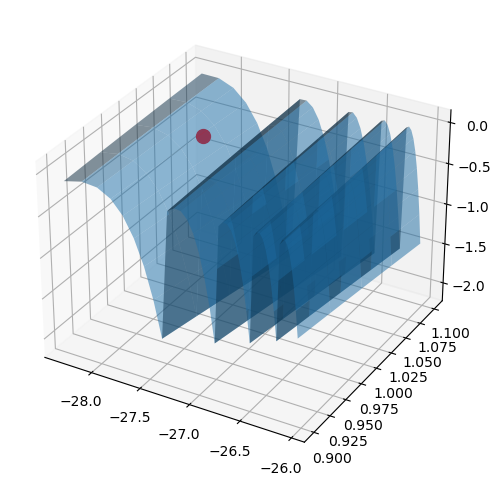

In [71]:

h_values_log = np.log(h_values)

X,Y = np.meshgrid(iota_values,h_values_log)

surface_pulsar = surface_pulsar.reshape(X.shape)



import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
ax.plot_surface(Y, X, surface_pulsar,alpha=0.5)


ax.scatter(np.log(1e-12),1.0, 0.0,c='r',s=100)

#ax.scatter(1e-12,1.0,c='r',s=200)

In [9]:
yc_pulsar = np.zeros((len(x),len(seeds)))
for i in range(len(seeds)):
    for j in range(len(x)):
        yc_pulsar[j,i] = iterate_over_iota(x[j],measurement_model="pulsar",seed = seeds[i])


In [ ]:
import matplotlib.pyplot as plt 

for i in range(len(seeds)):
    y = yc_pulsar[:,i]
    plt.plot(x,y)
    idx = np.argmax(y)
    xc = x[idx]
    plt.axvline(xc,c='C1',linestyle='--')
    print(seeds[i], xc)


plt.axvline(1.0,c='0.5',linestyle='--')



In [11]:
yc_earth = np.zeros((len(x),len(seeds)))
for i in range(len(seeds)):
    for j in range(len(x)):
        yc_earth[j,i] = iterate_over_iota(x[j],measurement_model="earth",seed = seeds[i])



1237 0.682265071234147
1238 0.682265071234147
1239 0.682265071234147
1240 0.682265071234147
1241 0.682265071234147
1242 0.682265071234147
1243 0.682265071234147
1244 0.682265071234147
1245 0.682265071234147
1246 0.682265071234147


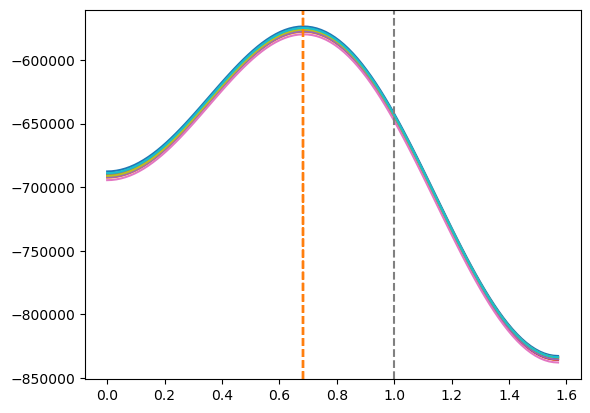

In [12]:
import matplotlib.pyplot as plt 

for i in range(len(seeds)):
    y = yc_earth[:,i]
    plt.plot(x,y)
    idx = np.argmax(y)
    xc = x[idx]
    plt.axvline(xc,c='C1',linestyle='--')
    print(seeds[i], xc)


plt.axvline(1.0,c='0.5',linestyle='--')



1237 1.0313309216330129
1238 1.0313309216330129
1239 1.0313309216330129
1240 1.0313309216330129
1241 1.0313309216330129
1242 1.0313309216330129
1243 1.0313309216330129
1244 1.0313309216330129
1245 1.0313309216330129
1246 1.0313309216330129


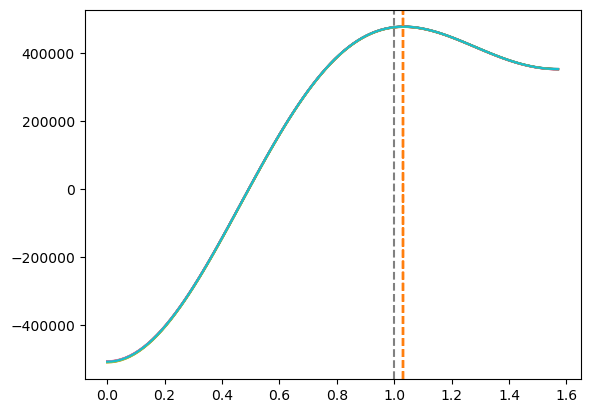

In [22]:

x = np.linspace(0.0,np.pi/2,100)

#seeds = [1237,1238,1239]
seeds = np.arange(1237,1247,1)

yc = np.zeros((len(x),len(seeds)))
#y = np.zeros_like(x)



for i in range(len(seeds)):

    for j in range(len(x)):

       # print(i,j)

        yc[j,i] = iterate_over_iota(x[j],measurement_model="earth",seed = int(seeds[i]))




0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
2 0
2 1
2 2
2 3
2 4


1237 0.7139983303613167
1238 0.7139983303613167
1239 0.7139983303613167
1240 0.7139983303613167
1241 0.7139983303613167
1242 0.7139983303613167
1243 0.7139983303613167
1244 0.7139983303613167
1245 0.7139983303613167
1246 0.7139983303613167


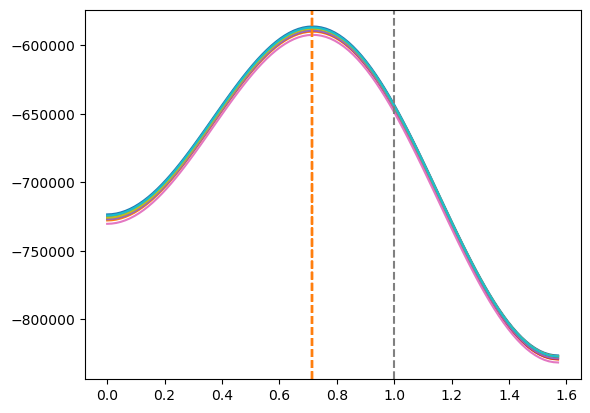

In [23]:
import matplotlib.pyplot as plt 

for i in range(len(seeds)):
    y = yc[:,i]
    plt.plot(x,y)
    idx = np.argmax(y)
    xc = x[idx]
    plt.axvline(xc,c='C1',linestyle='--')
    print(seeds[i], xc)


plt.axvline(1.0,c='0.5',linestyle='--')



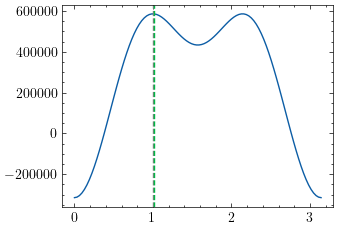

In [31]:
import matplotlib.pyplot as plt 
plt.plot(x,y)
plt.axvline(1.0,c='0.5',linestyle='--')

idx = np.argmax(y)
xc = x[idx]
plt.axvline(xc,c='C1',linestyle='--')

In [36]:

xearth = np.linspace(0.0,np.pi/2,100)
yearth = np.zeros_like(xearth)
for i in range(len(x)):
    print(i)
    yearth[i] = iterate_over_iota(xearth[i],"earth")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


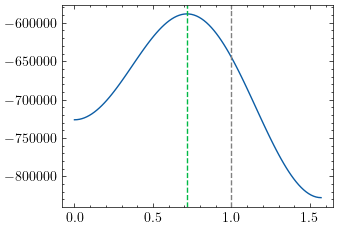

In [38]:
import matplotlib.pyplot as plt 
plt.plot(xearth,yearth)
plt.axvline(1.0,c='0.5',linestyle='--')

idx = np.argmax(yearth)
xc = xearth[idx]
plt.axvline(xc,c='C1',linestyle='--')

In [34]:
xc 

0.7139983303613167

In [13]:
iterate_over_iota(1.5)

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1234
INFO:root:You are including the PSR terms in your synthetic data generation


-5339975301.4442215

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1234


INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Earth terms measurement model


Ideal likelihood =  -1.2315883867846374e+18


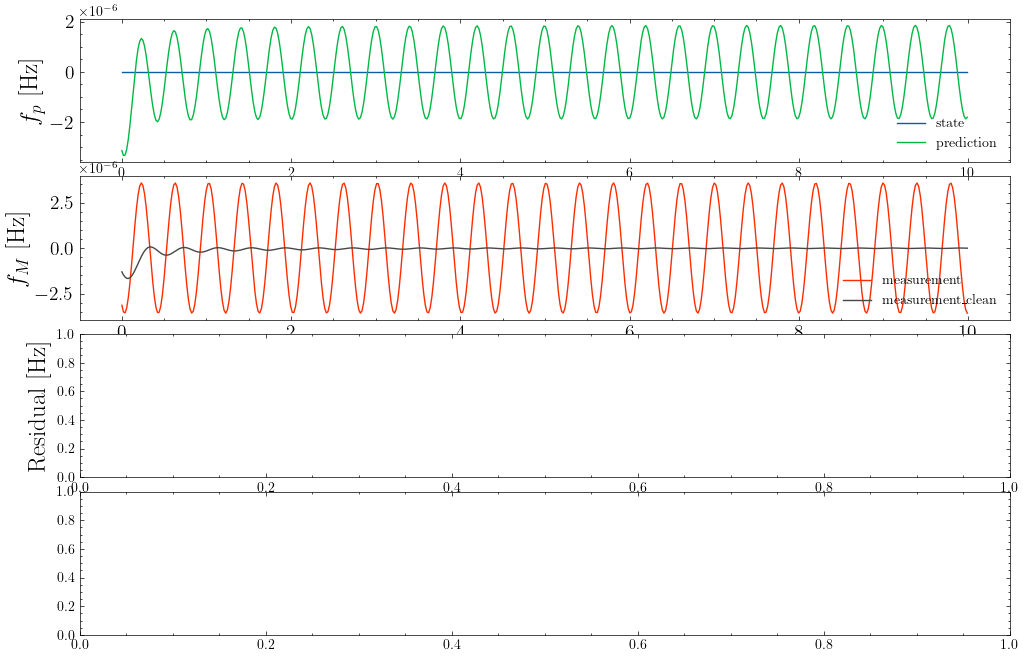

In [5]:
# Example Setup
P   = SystemParameters(h=1e-8,σp=0.0,σm=1e-13,use_psr_terms_in_data=True,measurement_model="earth")       # define the system parameters as a class
PTA = Pulsars(P)               #setup the PTA
data = SyntheticData(PTA,P) #generate some synthetic data


#Define the model 
model = LinearModel(P)


#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)


#Run the KF once with the correct parameters.
#This allows JIT precompile
guessed_parameters = priors_dict(PTA,P)
model_likelihood,xres,yres = KF.likelihood(guessed_parameters)
print("Ideal likelihood = ", model_likelihood)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured, xres,yres, 1,psr_index=1,savefig=None)


---


### 2. Likelihood curves

In [5]:
from plotting import iterate_over_priors


import matplotlib.pyplot as plt 
def plot_likelihood(x,y,x_logscale,y_logscale,variable_name,x_critical):

    h,w = 12,8
    rows = 1
    cols = 1
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=False)

    ax.plot(x,y)

    if x_logscale:
        ax.set_xscale('log')
    if y_logscale:
        ax.set_yscale('log')

    ax.axvline(x_critical,linestyle='--', c='C2')

    ax.set_xlabel(variable_name)
    ax.set_ylabel("likelihood")

    plt.show()



---


#### 2.1 GW source declination - $\delta$ 

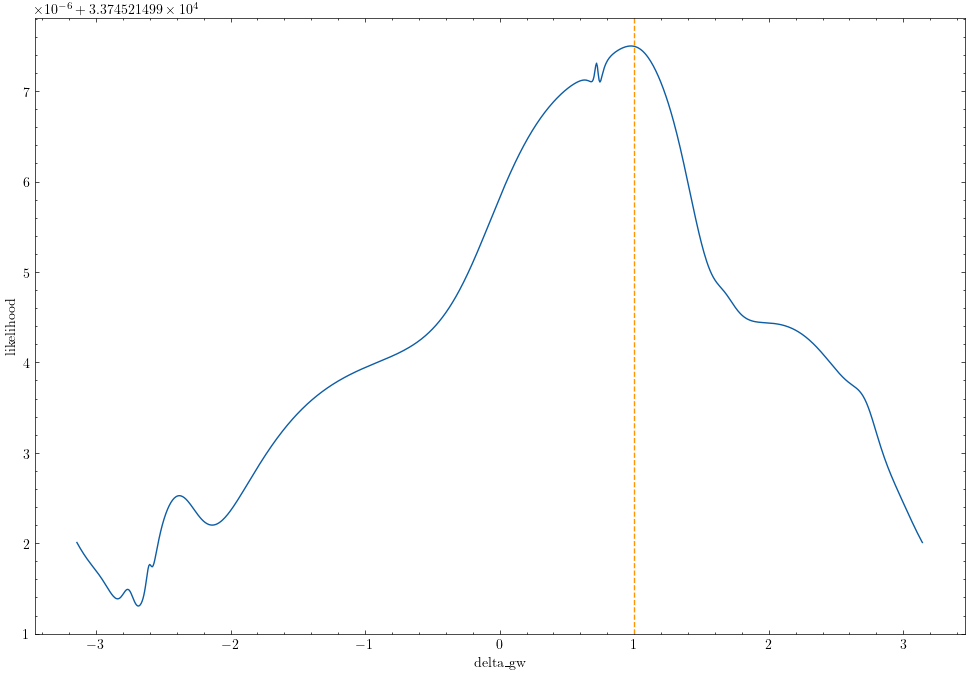

In [17]:
import numpy as np 
variable = "delta_gw"
variable_range = np.linspace(-np.pi,np.pi,int(1e3))
#guessed_parameters["sigma_m"] = 1e-1
#guessed_parameters["alpha_gw"] = 2.50
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable])


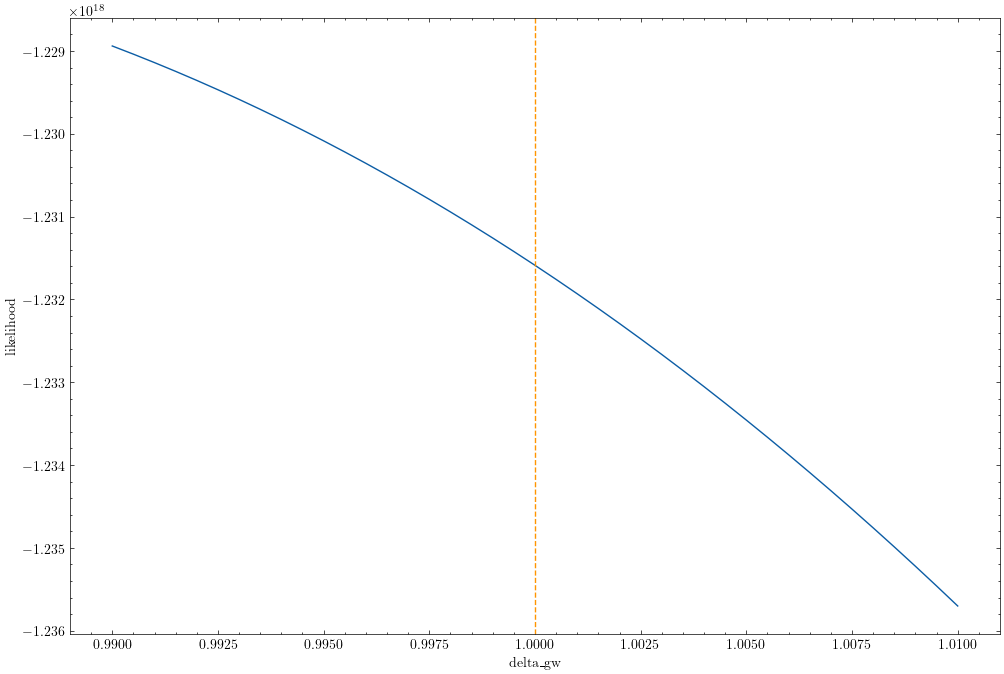

In [7]:
variable = "delta_gw"
variable_range = np.arange(0.99,1.01,0.0001)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable])


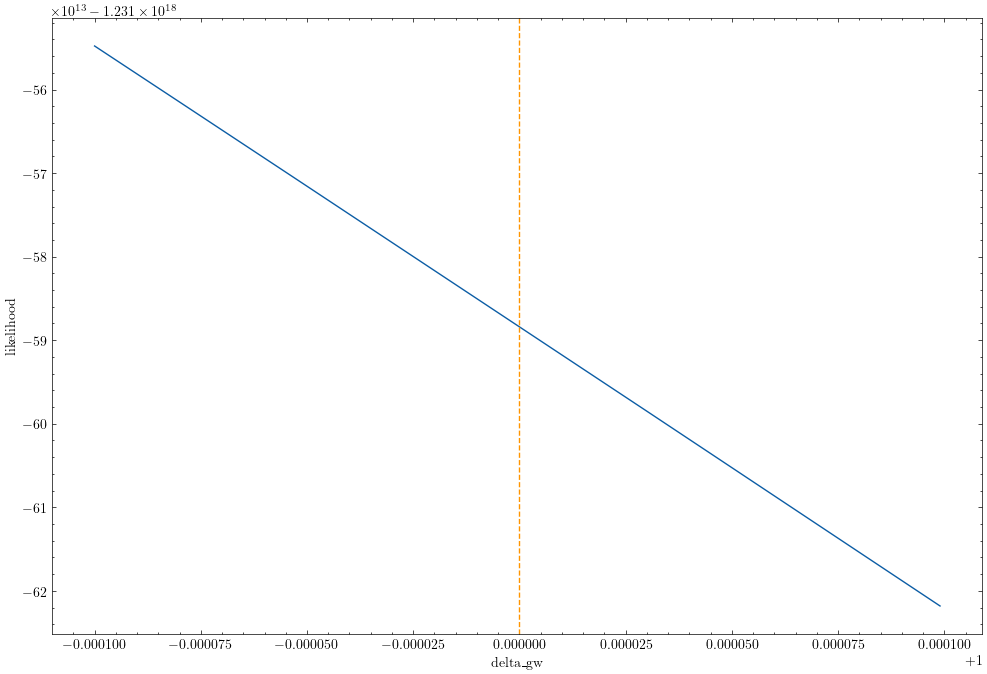

In [8]:
variable = "delta_gw"
eps = 1e-4
variable_range = np.arange(1.0-eps,1.0+eps,eps/100.0)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable])


---


#### 2.2 GW source angular frequency - $\omega$ 

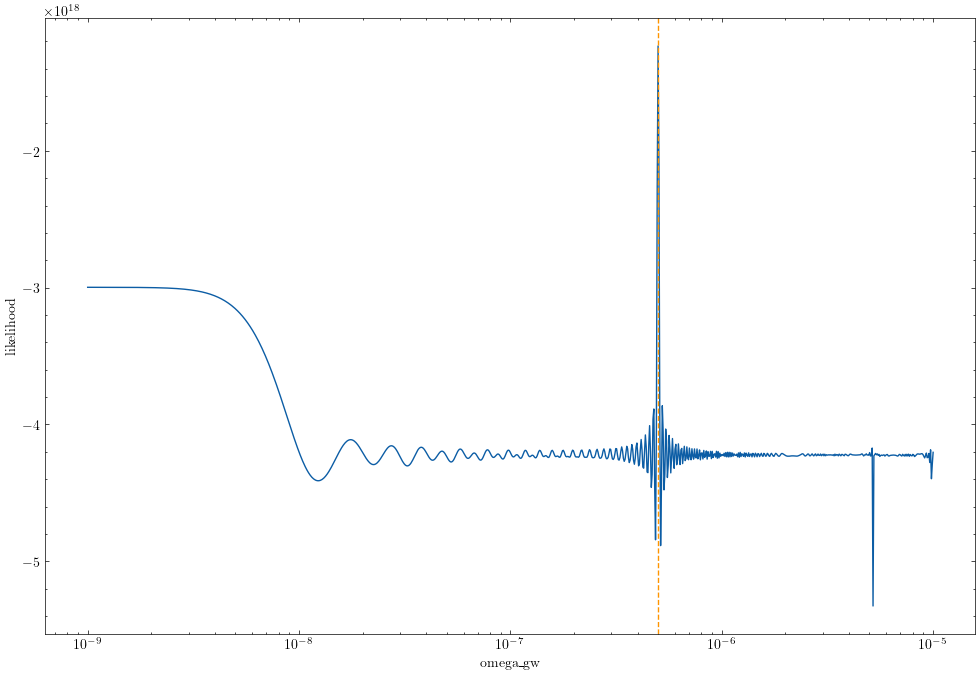

In [9]:
variable = "omega_gw"
variable_range = np.logspace(-9,-5,int(1e3))
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,False,variable,guessed_parameters[variable])


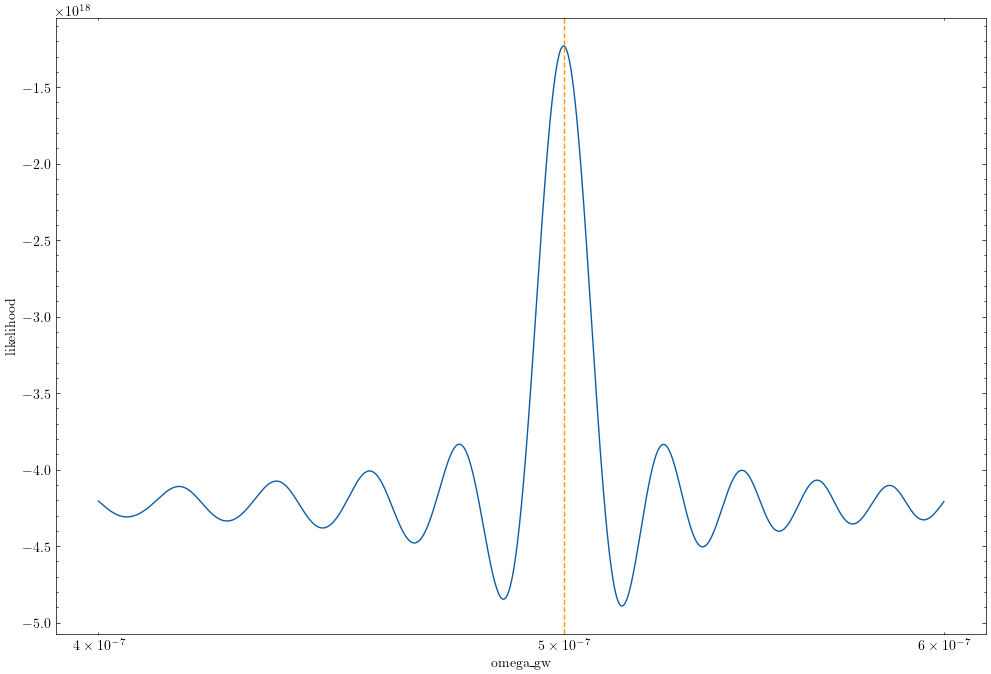

In [10]:
variable = "omega_gw"
variable_range = np.arange(4e-7,6e-7,1e-10)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,False,variable,guessed_parameters[variable])


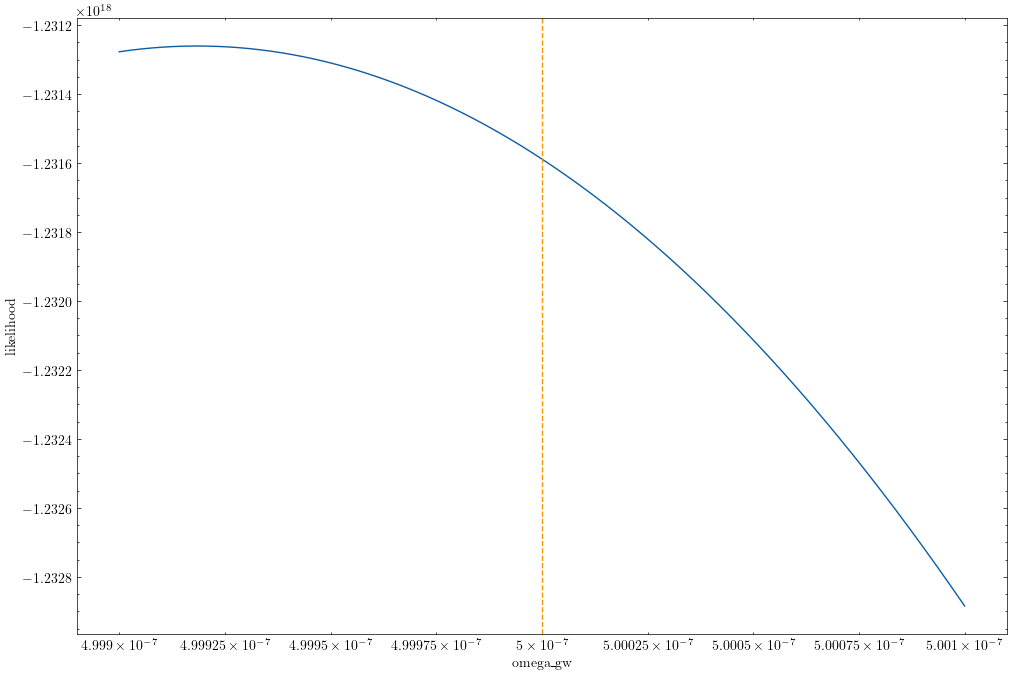

In [11]:
variable = "omega_gw"
eps = 1e-10
variable_range = np.arange(5e-7-eps,5e-7+eps,eps/500.0)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,True,False,variable,guessed_parameters[variable])


#### 2.3 GW source phase offset - $\Phi_0$

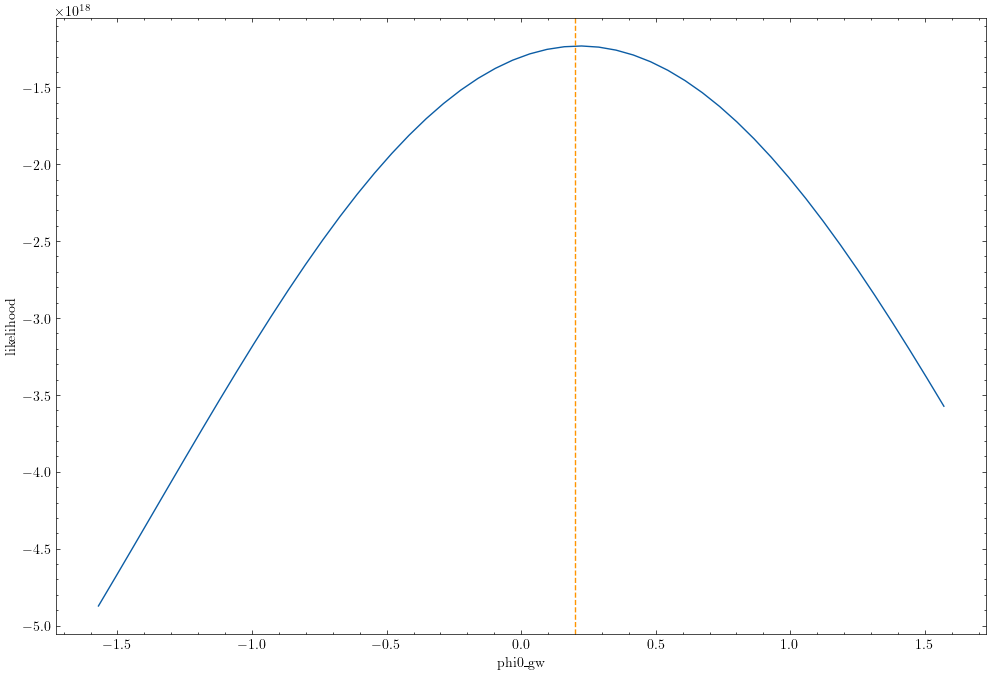

In [12]:
variable = "phi0_gw"
variable_range = np.linspace(-np.pi/2,np.pi/2)
likelihoods = iterate_over_priors(variable, variable_range,guessed_parameters,KF)
plot_likelihood(variable_range,likelihoods,False,False,variable,guessed_parameters[variable])


### 3. All likelihood curves for $\bar{\theta}_{GW}$

0 omega_gw 5e-07
1 psi_gw 2.5
2 phi0_gw 0.2
3 iota_gw 1.0
4 delta_gw 1.0
5 alpha_gw 1.0
6 h 1e-08


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


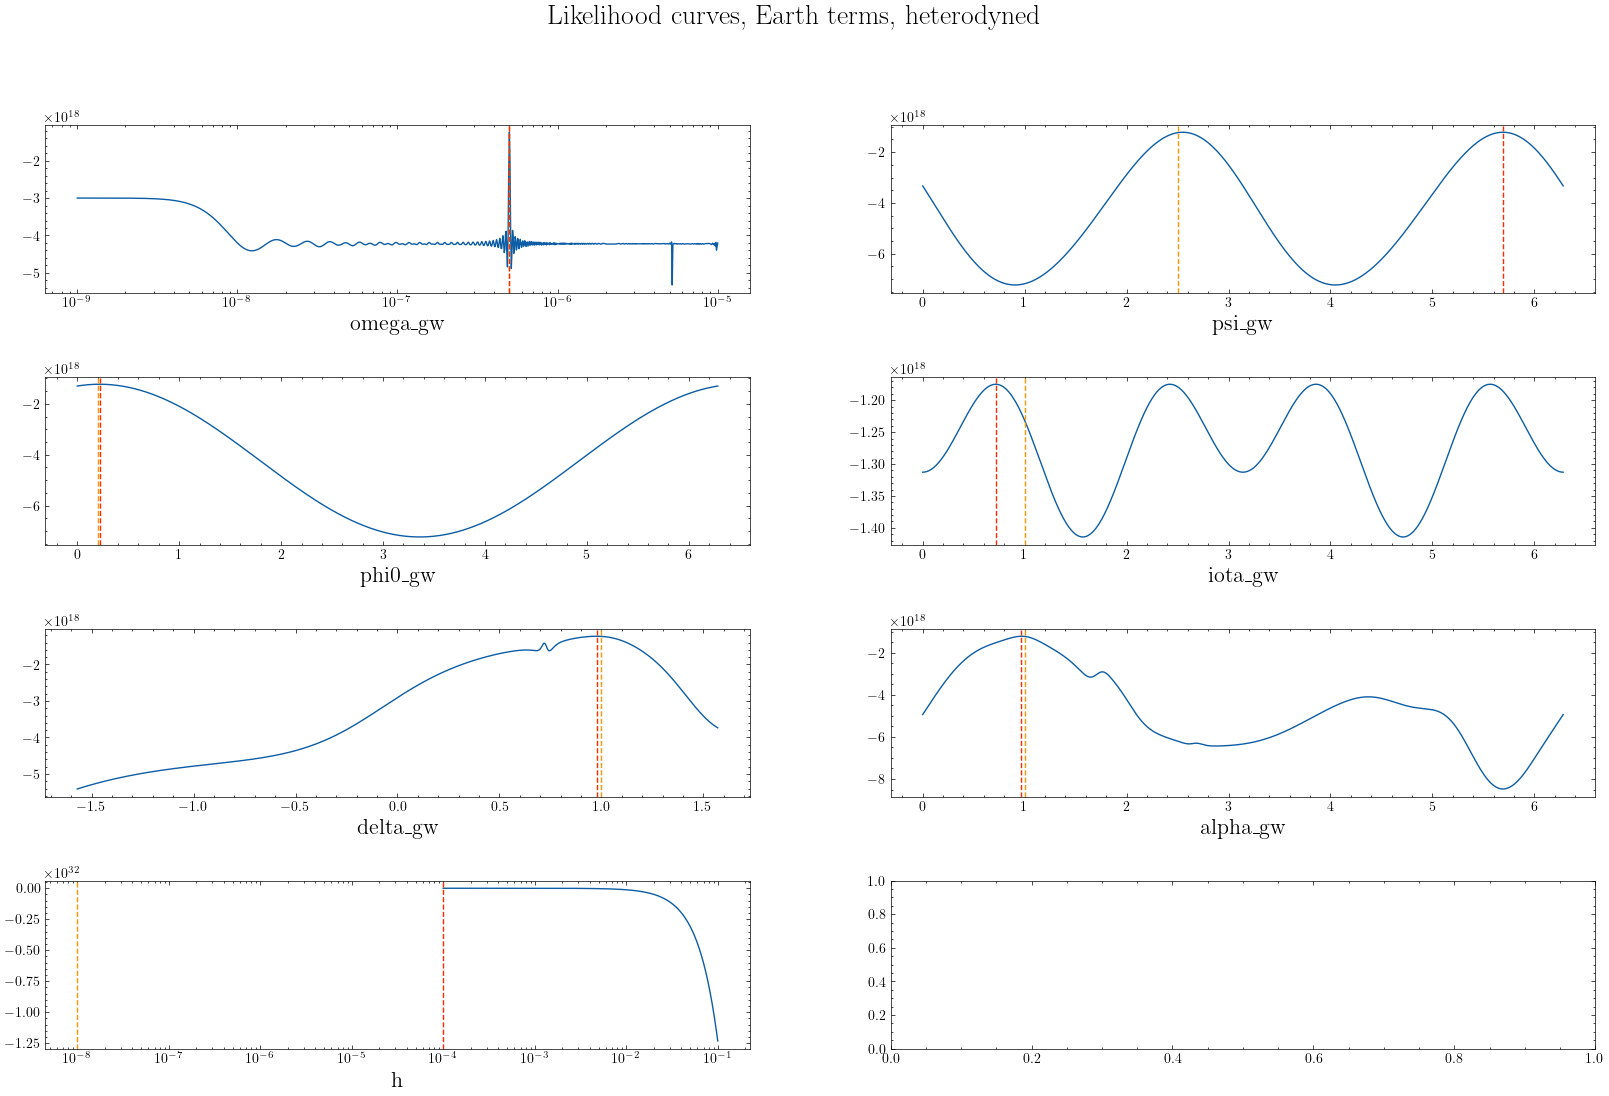

In [13]:
selected_parameters = ["omega_gw",
                       "psi_gw",
                        "phi0_gw",
                        "iota_gw",
                        "delta_gw",
                        "alpha_gw",
                        "h"]
parameters_dict = {k: guessed_parameters[k] for k in selected_parameters}


nsamples = int(1e3)

priors = [np.logspace(-9,-5,nsamples),                   # omega
          np.linspace(0,2*np.pi,nsamples),               # psi
          np.linspace(0,2*np.pi,nsamples),               # phi0
          np.linspace(0,2*np.pi,nsamples),               # iota
          np.linspace(-np.pi/2.0,np.pi/2.0,nsamples),    # delta
          np.linspace(0,2*np.pi,nsamples),               # alpha
          np.logspace(-4,-1,nsamples),                   # h
]

from plotting import likelihoods_over_priors
#likelihoods_over_priors(parameters_dict,priors,PTA,P,KF)
likelihoods_over_priors(parameters_dict,priors,PTA,P,KF,"Likelihood curves, Earth terms, heterodyned", savefig=None)


In [14]:
import numpy as np 
np.exp(10**30)

TypeError: loop of ufunc does not support argument 0 of type int which has no callable exp method

In [ ]:
x = float(10**30)

In [ ]:
x

1e+30

In [ ]:
np.exp(x)

/var/folders/bx/dsrq957n43bckqdm1vkk78yc0000gn/T/ipykernel_50284/1680261298.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(x)


inf